# 2487-2223 Machine Learning Assignment 1



## Question 1 (25 points) - Zestimate this House

Purchasing a house is a very big decision for most of us. Companies such as Zillows collected tons of data regarding the listing and sold price of American houses and build the predictive model, named *Zestimate*. You are expected to build a model similar as Zestimate to predict house price in Boston. 

![zestimate](https://i0.wp.com/www.housesoldeasy.com/wp-content/uploads/Screen-Shot-2016-08-15-at-7.22.09-PM.png?resize=300%2C258&ssl=1)

In [383]:
pwd

'/Users/lauraweil/Documents/Machine Learning/Ind_ass1'

In [1]:
import pandas as pd
import numpy as np

In [3]:
### DON'T MODIFY - LOAD DATA ### 

data_url = "http://lib.stat.cmu.edu/datasets/boston" 
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) # FEATURES 
y = raw_df.values[1::2, 2] # TARGET VARIABLE
assert X.shape[0] == y.shape[0], 'Mismatch in number of examples.'
print('Data loaded correctly.')
print('Features: X. Target variable (price): y.')
print('X shape: ',X.shape, 'y shape: ', y.shape)
### END ###

Data loaded correctly.
Features: X. Target variable (price): y.
X shape:  (506, 13) y shape:  (506,)


## EDA

In [5]:
#number of columns
raw_df.shape[1]

11

In [6]:
#head of dataframe
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [7]:
len(X)

506

In [8]:
len(y)

506

In [4]:
#creating pandas dataframe with X and y array with column names
data = np.hstack([X, y.reshape(-1, 1)])
column_names = column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Question 1.1 (5 points) 
Create train and test set, each contains 80% and 20% of the dataset, respectively, using *train_test_split* function in scikit-learn. Train a linear model on the train set and evaluate on the test set, report the training error and test error, respectively (as mean squared error).

In [9]:
import sklearn

In [17]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
seed = 3 

In [48]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = seed)
model = linear_model.LinearRegression()

In [12]:
#train set
train_x = train_set.iloc[:,0:(len(train_set.columns)-1)] 
train_y = train_set.iloc[:,-1]

In [13]:
#training model on the train set 
model.fit(train_x,train_y)

LinearRegression()

In [14]:
#test set
test_x = test_set.iloc[:,0:(len(test_set.columns)-1)] 
test_y = test_set.iloc[:,-1]

In [15]:
#Apply model to Training Set
pred_train = model.predict(train_x)
    
# Apply model to Test Set
pred_test = model.predict(test_x)

In [18]:
# Compute square error on train data
error_train = round(mean_squared_error(train_y, pred_train),2)
    
# Compute square error on test data (unseen)
error_test = round(mean_squared_error(test_y, pred_test),2)

In [19]:
print(f"The training error is {error_train} and the test error is {error_test}")

The training error is 23.41 and the test error is 16.94


#### Question 1.2 (5 points)

Perform a 10-fold cross-validation on the whole data set. Show the averaged mean sqaured error on both train and test set at each fold. Explain your findings.

In [20]:
from sklearn.model_selection import KFold

In [21]:
folds = KFold(n_splits=10, shuffle=True, random_state=42)

#Lists with train and test MSEs respectively 
train_mse_list = []
test_mse_list = []

# Perform 10-fold cross-validation
for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #Training the model
    model.fit(X_train, y_train)
    
    #MSE training set
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mse_list.append(train_mse)
    
    #MSE test set
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mse_list.append(test_mse)

In [22]:
pd.DataFrame({"Fold": np.arange(1,11),"Train Error Simple": train_mse_list,"Test Error Simple":test_mse_list})

,Fold,Train Error Simple,Test Error Simple
0,1,22.737590,14.995853
1,2,20.852821,32.804525
2,3,22.523709,17.599677
3,4,21.777057,23.368827
4,5,20.476103,35.152553
5,6,22.262544,19.155889
6,7,21.696286,24.140705
7,8,22.206383,19.547712
8,9,22.188014,20.268154
9,10,21.465364,26.608136


**Explanation Question 1.2**

The train error is the MSE of the linear regression model on the train set, while the test error is the MSE on the test set. Hence, we can say that the train error measures in sample performance, whereas the test error measures out of sample performance of the model. Considering the table above, we can see that the test error is generally higher than the train error. This means that the model has a relatively good fit, but it is not very good at generalizing to new data (i.e. the test data). Moreover, the test error is quite variable across folds, ranging from as low as 14.99% to as high as 35.15%. This indicates that the performance of the model can vary depending on the specific portion of the data that is used for testing. As a consequence, it is likely that the model is too sensitive to the train data, and therefore overfits, leading to high test errors. 

#### Question 1.3 (5 points) 
 
Add 2-degree squared polynomial features (with no interactions) and perform 10-fold cross-validation on the whole data set. Show the mean sqaured error on both train and test set at each fold. Explain your findings.

Hint: you may use sklearn.preprocessing.PolynomialFeatures and check how it produces the polynomial features with/without interaction terms.

In [ ]:
sklearn.preprocessing.PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Create an empty array with the same shape as X
X_squared = np.empty_like(X)

# Iterate through each column (feature) and square it element-wise
for i in range(X.shape[1]):
    X_squared[:, i] = X[:, i] ** 2
    
X_poly_no_interaction = np.hstack((X, X_squared))
polydf = np.hstack([X_poly_no_interaction, y.reshape(-1, 1)])

In [26]:
folds_poly = KFold(n_splits=10, shuffle=True, random_state=42)

#Lists with train and test MSEs respectively 
polytrain_mse_list = []
polytest_mse_list = []

# Perform 10-fold cross-validation
for train_index, test_index in folds_poly.split(X_poly_no_interaction):
    X_train, X_test = X_poly_no_interaction[train_index], X_poly_no_interaction[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #Training the model
    model.fit(X_train, y_train)
    
    #MSE training set
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    polytrain_mse_list.append(train_mse)
    
    #MSE test set
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    polytest_mse_list.append(test_mse)

In [28]:
pd.DataFrame({"Fold": np.arange(1,11),"Train Error Simple": train_mse_list,"Test Error Simple":test_mse_list})

,Fold,Train Error Simple,Test Error Simple
0,1,22.737590,14.995853
1,2,20.852821,32.804525
2,3,22.523709,17.599677
3,4,21.777057,23.368827
4,5,20.476103,35.152553
5,6,22.262544,19.155889
6,7,21.696286,24.140705
7,8,22.206383,19.547712
8,9,22.188014,20.268154
9,10,21.465364,26.608136


In [27]:
pd.DataFrame({"Fold": np.arange(1,11),"Train Error Poly": polytrain_mse_list,"Test Error Poly":polytest_mse_list})

,Fold,Train Error Poly,Test Error Poly
0,1,15.006067,8.059258
1,2,13.758195,19.165389
2,3,14.685211,11.485820
3,4,14.219525,15.247364
4,5,12.329310,34.656785
5,6,14.544648,14.055095
6,7,14.579986,11.922458
7,8,14.486820,12.533399
8,9,14.503166,12.904961
9,10,13.331417,23.815244


**Explanation findings question 1.3**

Comparing the table above to the table of the previous question, we can conclude that the quadratic regression model generally performs better than the simple linear regression model. Specifically, the train and test errors of the polynomial model are lower in (almost all of) the folds compared to the errors of the simple linear regression. This implies that the quadratic regression model seems to provide a better fit to the data which makes sense because the increased complexity (i.e. polynomial 2) allows to better capture the relationships between the features and target variable median price. In addition, the lower test errors imply that the quadratic model is better at generalizing to new data.

#### Question 1.4 (10 points)

Perform cross-validation using ridge regression and lasso regression on different feature combinations (linear features vs. polynomial features obtained earlier respectively. Explain which method works better in this case. Check the coefficients and explain the differences between ridge regression and lasso regression.

In [29]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

In [30]:
#Initializing
ridge = Ridge()
lasso = Lasso(alpha=1.0, max_iter=10000)
model_list = [ridge,lasso]
degree_list = [X, X_poly_no_interaction]

In [31]:
#cross val using ridge and lasso with simple linear model
for model in model_list:
    
    for x in range(2):
        model.fit(degree_list[x],y)
    
        #10-fold cross-validation with MSE
        test_scores = cross_val_score(model, degree_list[x], y, cv=10, scoring='neg_mean_squared_error')
        
        #Negate average of test errors 
        mean_test_error = -np.mean(test_scores)
        if model == ridge and x == 0:
            MSE_simple_ridge = mean_test_error
            ridge_simple_coef = model.coef_
        elif model == ridge and x==1:
            MSE_poly_ridge = mean_test_error
            ridge_poly_coef = model.coef_
        elif model == lasso and x ==0:
            MSE_simple_lasso = mean_test_error
            lasso_simple_coef = model.coef_  
        else:
            MSE_poly_lasso = mean_test_error
            lasso_poly_coef = model.coef_ 

In [32]:
index_labels = ["simple","polynomial"]
df_compare = pd.DataFrame({"Ridge MSE": [MSE_simple_ridge,MSE_poly_ridge],"Lasso MSE": [MSE_simple_lasso,MSE_poly_lasso]},index=index_labels)
df_compare

,Ridge MSE,Lasso MSE
simple,34.078246,34.464085
polynomial,26.942921,30.776932


In [33]:
index_labels2 = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [34]:
print("Table with coefficients for Lasso and Ridge simple regression:")
print("")
pd.DataFrame({"Ridge simple":ridge_simple_coef,"Lasso poly": lasso_simple_coef},index=index_labels2)

Table with coefficients for Lasso and Ridge simple regression:



,Ridge simple,Lasso poly
CRIM,-0.104595,-0.063437
ZN,0.047443,0.049165
INDUS,-0.008805,-0.000000
CHAS,2.552393,0.000000
NOX,-10.777015,-0.000000
RM,3.854000,0.949811
AGE,-0.005415,0.020910
DIS,-1.372654,-0.668790
RAD,0.290142,0.264206
TAX,-0.012912,-0.015212


In [35]:
index_labels3 = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','CRIM2','ZN2','INDUS2','CHAS2', 'NOX2','RM2','AGE2','DIS2','RAD2','TAX2','PTRATIO2','B2','LSTAT2']

In [37]:
print("Table with coefficients for Lasso and Ridge polynomial regression:")
print("")
poly_coefs = pd.DataFrame({"Ridge Poly":ridge_poly_coef,"Lasso Poly": lasso_poly_coef},index=index_labels3)
poly_coefs

Table with coefficients for Lasso and Ridge polynomial regression:



,Ridge Poly,Lasso Poly
CRIM,-0.351257,-0.000000
ZN,-0.054308,-0.000000
INDUS,-0.166512,-0.000000
CHAS,1.275836,0.000000
NOX,-6.403079,-0.000000
RM,-12.792450,-0.000000
AGE,-0.015272,0.000000
DIS,-2.343501,-0.000000
RAD,0.615301,0.000000
TAX,-0.028830,-0.030181


**Explanation question 1.4**

Ridge and Lasso regularization are used to prevent overfitting. Specifically, in both Ridge and Lasso regression a penalty is added to the cost function, reducing the effect of some features on the model’s predicted values. In Ridge regression, the value of coefficients shrink as Lambda (regularization parameter) increases. Ridge regularization results in relatively small but nonzero coeffficients.

On the other hand, Lasso regression pushes certain weights to be exactly 0. Crucially, this type of regularization tends to completely eliminate the coefficients of the least important features (i.e., set them to zero). In other words, Lasso regression creates a subset of features and returns only a few nonzero weights. 

The difference between Lasso and Ridge regression can be seen in the tables above. Whereas all features are assigned weights in Ridge regression, only a few features have non-zero weights in Lasso regression for both the simple and polynomial models.

With respect to the model performance, following the MSE, Ridge regression performs slightly better than Lasso regression for the simple models; Ridge regression has an MSE of 34.078246 and Lasso regression has an MSE of 35.037835.The same goes for the quadratic models: Ridge regression has an MSE of 26.942921 compared to an MSE of 30.748620 for Lasso regression. 

Conclusively, Ridge regression outperforms Lasso regression in all model combinations. This might be due to the fact that the Lasso regression is too constraining and therefore results in high bias. The model with the lowest MSE (26) and therefore the best model is Ridge regression wiht polynomials. In addition, following lower MSEs, adding polynomial features improves the performance of both Ridge and Lasso regression models when compared to using simple linear features. This is likely because the polynomial features increase the complexity, and therefore the fit of the model, resulting in lower bias and increased accuracy.

## Question 2 (25 points) - Cancer Detection

Given a dataset with features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, which describes characteristics of the cell nuclei present in the image, let's try to predict whether the patients are diagnosed as Malignant (M) or Benign (B).

In [38]:
# LOAD DATA 

from sklearn.datasets import load_breast_cancer
"""
DOCS:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
"""
X, y = load_breast_cancer(return_X_y=True)

## EDA Q2

In [39]:
## number of rows
len(X)

569

#### Question 2.1 (5 points) 
Use logistic regression to train the dataset through cross-validation, report the score on train and test set, respectively. Explain your findings.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
kf = KFold(n_splits=10)
train_acc_list = []
test_acc_list = []

for train_idx, test_idx in kf.split(X):
    log_reg = LogisticRegression(random_state=42, max_iter=5000)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    log_reg.fit(X_train, y_train)

    # Accuracy on the training set
    y_train_pred = log_reg.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_acc)

    # Accuracy on the test set
    y_test_pred = log_reg.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_acc_list.append(test_acc)

# Calculate the average accuracy across all folds for train and test sets
train_cv_score = np.mean(train_acc_list)
test_cv_score = np.mean(test_acc_list)
print(f"Cross-validated train set score: {train_cv_score:.4f}")
print(f"Cross-validated test set score: {test_cv_score:.4f}")

# Train the model on the entire dataset
final_log_reg = LogisticRegression(random_state=42, max_iter=5000)
final_log_reg.fit(X, y)

Cross-validated train set score: 0.9583
Cross-validated test set score: 0.9600


LogisticRegression(max_iter=5000, random_state=42)

**Explanation findings question 2.1**

An accuracy score of 0.9583 on the cross-validated training set indicates that the logistic regression model is able to correctly classify approximately 95.83% of the training samples on average across the 10 folds. Similarly, a test set score of 0.9600 shows that the model can correctly classify approximately 96.00% of the test samples on average across the 10 folds.

Crucially, significantly high accuracy are assoicated with risk of overfitting (especially when there are many feature variables). Namely, high accuracy scores might imply that the model is too adjusted to the training set and therefore has a high chance of error due to variance. However, following the proximity of the train and test error, it can be concluded that the model also performs well on out of sample data, and is therefore not overfitting. Consequently, the model should be able to generalize well to new data.

#### Question 2.2 (5 points) 
By default, sklearn's logistic regression uses the L2 regularization. Now use the logistic regression without any regularzation to perform cross validation, report what do you find on train and test set.

In [59]:
kf = KFold(n_splits=10)
train_acc_list = []
test_acc_list = []

for train_idx, test_idx in kf.split(X):
    log_reg = LogisticRegression(random_state=42, max_iter=10000,penalty='none')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    log_reg.fit(X_train, y_train)

    # Accuracy on the training set
    y_train_pred = log_reg.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_acc)

    # Accuracy on the test set
    y_test_pred = log_reg.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_acc_list.append(test_acc)

# Calculate the average accuracy across all folds for train and test sets
train_cv_score = np.mean(train_acc_list)
test_cv_score = np.mean(test_acc_list)
print(f"Cross-validated train set score: {train_cv_score:.4f}")
print(f"Cross-validated test set score: {test_cv_score:.4f}")

# Train the model on the entire dataset
final_log_reg = LogisticRegression(random_state=42, max_iter=10000,penalty='none')
final_log_reg.fit(X, y)

Cross-validated train set score: 0.9890
Cross-validated test set score: 0.9800


LogisticRegression(max_iter=10000, penalty='none', random_state=42)

**Explanation findings question 2.2**

As can be seen above, the cross validated train test score and cross validated test set score are both higher compared to train and test scores generated in the previous question (Logisitc regression with L2 regularization). Given L2 regularization penalizes complex models, hereby decreasing fit and incrasing bias, it was expected that the cross validated train score for Logistic Regression with L2 regularization was lower (because the model is less sensitive to training data). 

Following this hypothesis, it was also hypothesized that the L2 with regularization would generate higher test scores (i.e., better able to generalize to new data) because it is less prone to overfitting. However, the test set score is also higher for the logistic regression without regularization, suggesting that this model is better at generalizing to new data. A significantly high test score for the logistic regression without L2 regularization might be caused by various factors including (but not limited to) high multicollinearity between features, low degree of complexity in dataset, and low degree of noise and outliers.

#### Question 2.3 (15 points) 
Check how many Benign and Malignant cases in the dataset. What might be the problem if we use the default score of the logistic regression cross-validation? Now adjust the class weight of M and L and retrain the model again to bias toward Malignant, using the relative weight of M and L as 2:1. What about the relaive weight to be 5:1, or 10:1? Explain what you find.

Hint: you can use LogisticRegressionCV to combine LogisticRegression and cross-validation. 

In [52]:
# number of Benign cases in dataset
benign = 0
for x in y:
    if x == 0:
        benign += 1

# number of Malignant cases in the dataset
malignant = 0 

for x in y:
    if x == 1:
        malignant += 1

print(f"The number of Benighn cases in the dataset is {benign}.")
print(f"The number of Malignant cases in the dataset is {malignant}.")

The number of Benighn cases in the dataset is 212.
The number of Malignant cases in the dataset is 357.


In the context of breast cancer detection the cost of false negatives is significantly high (labeling a malignant case as benign could have serious consequences for the patient). Therefore, the problem when using the default score of logisitc regression cross-validation is that the default score of logistic regression cross-validation may lead to a model that prioritizes overall accuracy at the expense of high false negative rates for the Malignant class. This is because the default scoring metric for binary classification in scikit-learn is accuracy, which places equal weight on both true positives and true negatives. Hence, in the context of breast cancer detection we need to adjust the model in such a way that it factors in the high cost of misclassifying true (malignant) values as false (benign).

**Updated model with weights**

In [55]:
from sklearn.linear_model import LogisticRegressionCV

In [56]:
# Define class weight ratios to try
weight_ratios = [1, 2, 5, 10]

for weight_ratio in weight_ratios:
    # Set class weights based on weight ratio
    class_weight = {0: 1, 1: weight_ratio}

    # Define logistic regression model with cross-validation and class weights
    log_reg = LogisticRegressionCV(random_state=42, max_iter=10000, cv=10, class_weight=class_weight)

    # Train the model on the data
    log_reg.fit(X, y)

    # Print the accuracy score for the model
    print(f"Weight ratio: {weight_ratio}")
    print(f"Cross-validated train set score: {log_reg.scores_[1].mean():.4f}")
    print(f"Cross-validated test set score: {log_reg.score(X_test, y_test):.4f}")

Weight ratio: 1
Cross-validated train set score: 0.9510
Cross-validated test set score: 0.9800
Weight ratio: 2
Cross-validated train set score: 0.9454
Cross-validated test set score: 1.0000
Weight ratio: 5
Cross-validated train set score: 0.9463
Cross-validated test set score: 1.0000
Weight ratio: 10
Cross-validated train set score: 0.9410
Cross-validated test set score: 0.9600


**Explanation findings question 2.3**

Weight ratio: 1
This is the case when both classes have equal weights. The train set score is 0.9510, and the test set score is 0.9800. This means that the model's average accuracy is 95.10% on the train set and 98% on the test set across all cross-validation folds.

Weight ratio: 2
In this case, the minority class has twice the weight of the majority class. The train set score is 0.9454, and the test set score is 1.0000. The train set score slightly decreased compared to the weight ratio of 1, but the test set score increased to 100%. This might indicate that the model is slightly better at generalizing to unseen data when the minority class is given more importance.

Weight ratio: 5
With a weight ratio of 5, the minority class is now given five times more weight than the majority class. The train set score is 0.9463, and the test set score is 1.0000. Similar to the weight ratio of 2, the train set score is slightly lower than the equal weight case, but the test set score remains at 100%. This suggests that further increasing the importance of the minority class doesn't seem to improve the model's performance on the test set.

Weight ratio: 10
The minority class is given ten times more weight than the majority class. The train set score is 0.9410, and the test set score is 0.9600. In this case, both the train and test set scores have decreased compared to the previous weight ratios. This could indicate that the model is now overemphasizing the minority class, leading to reduced overall performance.

In summary, your results show that giving more weight to the minority class can improve the model's performance on the test set, but only up to a certain point. In this case, weight ratios of 2 and 5 yielded the best test set scores. However, further increasing the weight of the minority class (i.e., a weight ratio of 10) led to reduced performance on both the train and test sets.

## Question 3 (50 points) - Call Me Maybe? 



![telemarketing](https://neilpatel.com/wp-content/uploads/2019/08/profissional-de-telemarketing-sorridente.jpeg)

Telemarketing is a method of direct marketing in which a salesperson solicits prospective customers to buy products or services over the phone. It has become one of the most widely used marketing campaign methods to engage with customers with product and service opportunity. We have collected real data from a Portuguese retail bank, from May 2008 to June 2013 with thousands of phone contacts. 




The current practice of many data teams is to build such propensity models and predict customer's probability to adopt the product and target them from the highest probability to the lowest probability. Note that telemarketing may incur some costs for contacting the customer, thus the success (i.e., the generated profit) of using machine learning model requries further inspection.  As the data scientist, you are asked to build a propensity model to evaluate the effectiveness of their telemarketing campaigns, i.e. whether the customer subscribed to the term deposit.  

**Telemarketing Dataset (bank.csv)**
All customers are contained in the file bank.csv. Each line of this file after the header row represents one customer of the Portuguese bank, and has the following format:

### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'primary', 'secondary', 'tertiary')
- balance: amcount of bank account balance
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone', 'unknown')
- day: last contact day of month
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration: last contact duration, in seconds (numeric). **Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed.**

### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- y - has the client subscribed a term deposit? (binary: 'yes','no')


Answer the following questions using the provided dataset. You can write down intermediate results towards the final answers. If any model invovles random_state, set it to be 42.

In [60]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [61]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [62]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [63]:
bank.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

### Question 3.1 (15 points)

Split the data into 80% training set and 20% test set. **Build a pipeline to preprocess the indicated numerical features and categorical features separately**. For numerical features 'balance', 'campaign', standardize these features. For categorical features 'job', 'marital', 'education', 'default', transform them through one-hot encoding. For the numeric feature 'age', convert it into the quartile categorical variable and transform it through one-hot encoding. 

Train a Logistic regression model with L2 regularization using 5-fold cross validation (default hyperparameter) on the train set and show the accuracy, precision, recall on the train set. Explain whether the model is useful for the bank to identify the customer propensity.

## 0 Importing libraries

In [71]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder

## 0 Train Test Split

In [65]:
# Split the data into train and test sets
train_data, test_data = train_test_split(bank, test_size=0.2, random_state=42)

bank_train = train_data 

## 1 EDA 

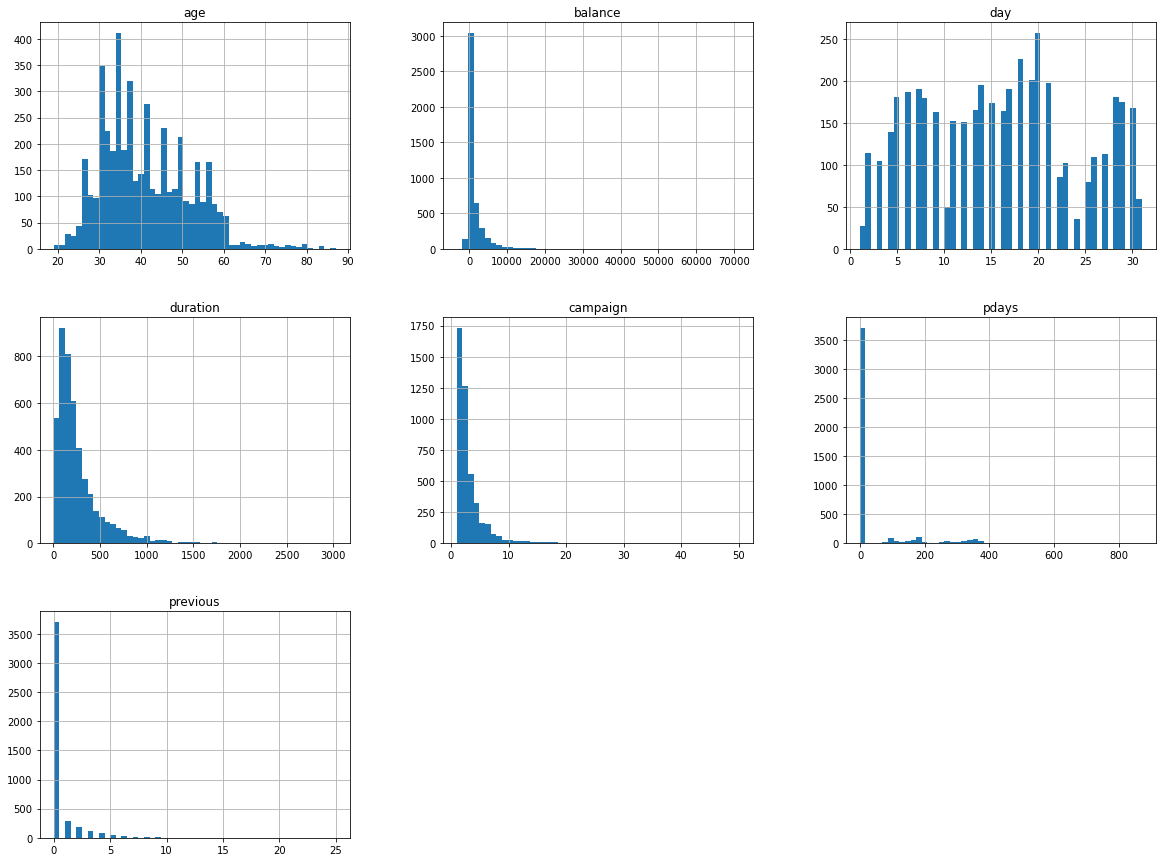

In [66]:
%matplotlib inline

bank.hist(bins=50, figsize=(20,15))

plt.show()

In [67]:
# check for nan values
sample_incomplete_rows = bank[bank.isnull().any(axis=1)].head()

## 2 Preprocessing Pipeline

In [72]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]

class AgeToQuartileTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, age_col='age'):
        self.age_col = age_col
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        age_quartiles = pd.cut(X[self.age_col], bins=np.percentile(X[self.age_col], [0, 25, 50, 75, 100]), include_lowest=True, labels=False)
        return age_quartiles.to_frame()

def get_preprocessor(num_attribs, cat_attribs, age_col='age'):
    label_encoder = LabelEncoder()
    
    num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

    cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

    age_pipeline = Pipeline([
        ('selector', DataFrameSelector([age_col])),
        ('age_to_quartile', AgeToQuartileTransformer(age_col)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

    preprocessor = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs),
        ('age', age_pipeline, [age_col]),
    ])

    return preprocessor

In [73]:
# defining attributes 
cat_attribs = ["job", "marital", "education", "default"]
num_attribs = ["balance","campaign"]

In [74]:
preprocessor = get_preprocessor(num_attribs,cat_attribs,age_col="age")

In [75]:
banking_prepared = preprocessor.fit_transform(bank_train)

In [76]:
banking_prepared.shape

(3616, 27)

In [77]:
bank[["balance","campaign","job","marital","education","default","age"]].shape

(4521, 7)

## 3 Logistic Regression Model and Performance scores

In [78]:
# define target variable
y = bank_train["y"]

log_reg_cv = LogisticRegressionCV(random_state=42, solver='lbfgs', max_iter=1000, n_jobs=-1)

# Train the model on the training data
log_reg_cv.fit(banking_prepared,y)

# Make predictions on the testing data
y_pred = log_reg_cv.predict(banking_prepared)

#Calculate the precision score and avoid the warning message
precision = precision_score(y, y_pred, pos_label="yes",zero_division=1)
recall = recall_score(y, y_pred, pos_label='yes')
accuracy = accuracy_score(y, y_pred)

print(f"Accuracy is {accuracy}.")
print(f"Recall is {recall}.")
print(f"Precision is {precision}.")

Accuracy is 0.8830199115044248.
Recall is 0.0.
Precision is 1.0.


**Explanation findings question 3.1**

To determine if the model is useful for the bank to identify customer propensity, performance metrics including accuracy, recall, and precision need to be considered. At first sight, accuracy of 0.8830, meaning the proporiton of correct predicitions of the total predictions. Overall the model makes true predictions in about 80% of the cases. Secondly, a precision score of 1 means that the model is always correct when it predicts that a customer will subscribe. However, the recall (i.e. the proportion of true positive predictions out of the total actual positive cases) of 0.0 indicates that the model is not able to identify any customers who will subcribe to the deposit. Therefore, the precision score of 1 is likey due to the fact that the model does not make any positive predictions at all.

Based on these performance metrics, the model is not useful for the bank to identify customers who will make a deposit. The recall of 0.0 indicates that the model is not able to identify any customers who will acquire the product, even though it has high precision.

### Question 3.2 (10 points)

Now add more features to the model to see if we can improve the performance (categorical features: 'housing', 'loan' and numerical features: 'day', 'duration'). Use the preprocess pipeline built previously to transform the data. Train a Logistic regression model with L1 regularization using 5-fold cross validation on the train set, by fine-tuning the hyperparameter alpha, i.e. the regularization strength from [0.001, 0.01, 0.1, 1]. Choose the correct score function that **reflect the current data team's practice**. Report the average score with the best hyperparameter. **Does model performance improve, and if so, how?**

**Expalin whether all features are useful for making prediction and why. List top 5 features that contribute to the prediction the most. If not all features are useful, list those unuseful features.**

## 1 Defining preprocessor with extra features

In [79]:
# defining features
cat_attribs2 = ["job","marital","education","default","housing","loan"]
num_attribs2 = ["balance","campaign","day","duration"]

In [82]:
preprocessor2 = get_preprocessor(num_attribs2,cat_attribs2,age_col="age")

In [83]:
banking_prepared2 = preprocessor2.fit_transform(train_data)

**Justification for score function recall:**

The current practice of the data team is to build such propensity models and predict customer's probability to adopt the product and target them from the highest probability to the lowest probability. We need to factor in that telemarketing incurs costs for contacting the customer. However, considering the oppurtunity costs of missed memberships are larger than the costs of contacting people who don't acquire the product (i.e., false positives), the cost of of false negatives is highest. In order to minimze the false negative rate, we need to consider recall as score function.

In [84]:
alpha_list = [0.001, 0.01, 0.1, 1]

log_reg_cv2 = LogisticRegressionCV(penalty="l1", solver='liblinear',random_state=42, max_iter=1000, n_jobs=-1, Cs=alpha_list, scoring="recall")

# Train the model on the training data
log_reg_cv2.fit(banking_prepared2,y)

# Make predictions on the testing data
y_pred2 = log_reg_cv2.predict(banking_prepared2)

#Calculate the precision score and avoid the warning message
precision = precision_score(y, y_pred2, pos_label="yes",zero_division=1)
recall = recall_score(y, y_pred2, pos_label='yes')
accuracy = accuracy_score(y, y_pred2)

print(f"Accuracy is {accuracy}.")
print(f"Recall is {recall}.")
print(f"Precision is {precision}.")
print("")
print('Best alpha:', log_reg_cv2.C_[0])
print(f"Average score for alpha {log_reg_cv2.C_[0]}:",log_reg_cv2.scores_["yes"].mean(axis=0).max())

Accuracy is 0.8896570796460177.
Recall is 0.19621749408983452.
Precision is 0.5845070422535211.

Best alpha: 1.0
Average score for alpha 1.0: 0.18921568627450983


**Does model performance improve?**

The model performance improves when using l1 regularization and setting "recall" as score function. Altough the accuracy is about the same (0.88) the recall score improved from 0.0 to 0.20. By combining L1 regularization with "recall" as the score function, the model is encouraged to select only the most relevant features while also prioritizing the identification of all positive cases, which leads to improved performance given the cost of false negatives is high in this context.

## 2 Feature Importance Ranking

In order to determine what features contribute to prediction the most the coefficients of the best model (log_reg_cv2) are considered.


In [85]:
# retrieving the names of the input features 
num_attribs = preprocessor2.named_transformers_['num']['selector'].attribute_names
cat_attribs = preprocessor2.named_transformers_['cat']['cat_encoder'].get_feature_names_out(cat_attribs2)
age_attribs = ['age_quartile_0', 'age_quartile_1', 'age_quartile_2', 'age_quartile_3']

feature_names = np.concatenate([num_attribs, cat_attribs, age_attribs])

# retrieving the coefficients of log_reg_cv2
coefficients = log_reg_cv2.coef_.flatten()

# Create a DataFrame with coefficients and feature names
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
print("The top 5 features that contribute to prediction the most are: ")
coef_df.sort_values(by="abs_coefficient",ascending=False).head(5)

The top 5 features that contribute to prediction the most are: 


,feature,coefficient,abs_coefficient
3,duration,1.026792,1.026792
28,loan_yes,-0.795112,0.795112
26,housing_yes,-0.754531,0.754531
9,job_retired,0.716577,0.716577
6,job_entrepreneur,-0.664743,0.664743


The last 8 features in the table below have coefficients equal to zero, meaning they have no impact on the target variable. They should therefore be left out of the model. In addition, discarding features with a significantly small coefficients (for instance, smaller than 0.10) might benefit the model as it reduces  chances of overfitting (and therefore ensures a low variance error). As a consequence, a list of features to drop constitutes:

education_primary,
job_services,
job_self-employed,
age_quartile_2,
balance,
marital_single,
age_quartile_1,
day,
education_secondary,
default_yes,
housing_no,
job_technician,
loan_no,
job_housemaid,
age_quartile_0,
marital_divorced

In [86]:
print("Table with sorted coefficients:")
coef_sorted = coef_df.sort_values(by="abs_coefficient",ascending=False)
coef_sorted.reset_index(drop=True,inplace=True)
coef_sorted.index += 1
coef_sorted.tail(20)

Table with sorted coefficients:


,feature,coefficient,abs_coefficient
14,education_unknown,-0.252111,0.252111
15,job_management,0.184916,0.184916
16,job_unemployed,-0.174915,0.174915
17,age_quartile_3,0.103570,0.103570
18,education_primary,-0.089949,0.089949
19,job_services,-0.058401,0.058401
20,job_self-employed,-0.053161,0.053161
21,age_quartile_2,-0.037910,0.037910
22,balance,0.026998,0.026998
23,marital_single,-0.020998,0.020998


### Question 3.3 (10 points)

Now use the best model found in the cross-validation to predict the test set, show the obtained confusion matrix. Assume that targeting each customer would cost 10 euros and if the customer subscribe, the company would earn 50 euros. If we perform targeted telemarketing to all customers that are predicted to subscribe in the test set, what's the resulting profit?

In [87]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [89]:
#retrieve the actual y values of the test set
test_y = test_data["y"]

# transform test data with preprocessing pipeline
test_data_transformed = preprocessor2.transform(test_data)

# use best model (log_reg_cv2) to make predictions
test_pred = log_reg_cv2.predict(test_data_transformed)

# compute confusion matrix
cm = metrics.confusion_matrix(test_y, test_pred)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

print(cm)
print("")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

[[792  15]
 [ 75  23]]

True Negatives: 792
False Positives: 15
False Negatives: 75
True Positives: 23


In [92]:
subscription = 50 
target_cost = 10 

class Profit():
    def __init__(self):
        self.subscription = 50
        self.target_cost = 10
    
    def profit_calc(self, tp, fp):
        profit_tp = tp*(self.subscription-self.target_cost)
        loss_fp = fp*(-self.target_cost)
        profit = profit_tp + loss_fp 
        return profit
    
profit = Profit().profit_calc(tp,fp)
print(f"The resulting profit would be equal to {profit}")

The resulting profit would be equal to 770


### Question 3.4 (10 points)

Now adjust the decision threshold in order to optimize the obtained profit. What would be the resulting threshold and profit? Is the propensity model built based on the targeting predicted probability useful in terms of profit maximizing? Explain.

In [93]:
from sklearn.metrics import precision_recall_curve

In [97]:
le = LabelEncoder()
train_y = train_data["y"]
train_y_en = le.fit_transform(train_y)
test_y = le.transform(test_y)

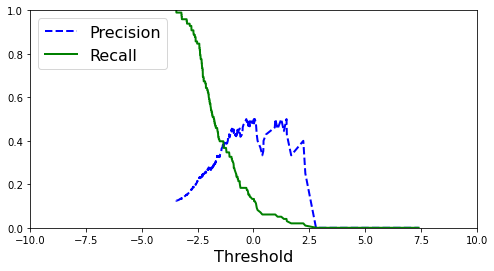

In [101]:
# first we explore relatinoship between recall and precision
y_scores = cross_val_predict(log_reg_cv2, test_data_transformed, test_y, cv=5, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(test_y, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-10, 10])

plt.show()

In [98]:
# update Profit class with optimization method 
class Profit():
    def __init__(self):
        self.subscription = 50
        self.target_cost = 10
        self.le = LabelEncoder()
    
    def profit_calc(self, tp, fp):
        self.profit_tp = tp*(self.subscription-self.target_cost)
        self.loss_fp = fp*(-self.target_cost)
        self.profit = self.profit_tp + self.loss_fp 
        return self.profit
    
    def profit_maximization(self,model):
            
        profits = []
        thresholds = np.linspace(0,1,num=1000)
            
        for threshold in thresholds:
                
            # Use predict_proba to compute the probabilities for each customer
            probabilities = model.predict_proba(test_data_transformed)[:, 1]
            
            # Compute the predicted labels based on the threshold
            y_pred = (probabilities >= threshold).astype(int)
            
            # confusion matrix
            confusion_matrix = metrics.confusion_matrix(test_y, y_pred)
            
            # Calculate number of true positives and false negatives
            tp = confusion_matrix[1, 1]
            fp = confusion_matrix[0, 1]
            
            # Calculate profit
            profit = self.profit_calc(tp, fp)
            
            # Store the profit
            profits.append(profit)
            
        # Plot the profits as a function of the threshold
        plt.plot(thresholds, profits)
        plt.xlabel('Threshold')
        plt.ylabel('Profit')
        plt.title('Profit as a function of the threshold')
        plt.show()
            
        # Print the threshold value that maximizes the profit
        optimal_threshold = thresholds[np.argmax(profits)]
        print("Optimal threshold: {:.2f}".format(optimal_threshold))
            
        # Print the profit at the optimal threshold
        optimal_profit = profits[np.argmax(profits)]
        print("Optimal profit: {:.2f} euros".format(optimal_profit))

In [99]:
#initialize class 
best_threshold = Profit()

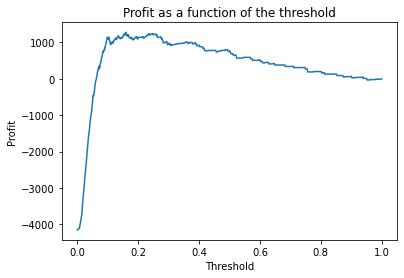

Optimal threshold: 0.16
Optimal profit: 1280.00 euros


In [100]:
best_threshold.profit_maximization(model=log_reg_cv2)

**Note on usefulness model:**

As we lowered the threshold compared to the original model (0.5 to 0.24), we are extremely positive in assessing people's willigness to subscribe. Specifically, if the predicted probability of someone subscribing to the deposit is greater than 0.24 this person is assigned a positive label ("yes"). This will increase the true positive rate (e.g. recall) but also the number of false positives. This model is useful in maximing profitability because it factors in the tradeoff between the cost of false positives (calling a customer without them subscribing), false negatives (oppurtunity costs of missed customer) and true positive (the yield of correctly predicting that a customer will subscribe).

### Question 3.5 (5 points)

Now train a random forest model, with 10 decision trees and max_depth=2, what is the profit that can be achieved given the threshold that you identified earlier? Do you need to increase or decrese the threshold to maximize the profit using random forest model? Explain your result.

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
# preparing features
train_y_rf = train_data["y"]
test_y_rf = le.transform(test_data["y"])
banking_prepared_rf = preprocessor2.transform(train_data)
test_prepared_rf = preprocessor2.transform(test_data)

In [107]:
# training random forest model
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
rf_clf.fit(banking_prepared_rf, train_y_rf)

#probabilties of positive class
probabilities = rf_clf.predict_proba(test_prepared_rf)[:,1]

# computing predicted labels based on the threshold
test_pred_thresh_rf = (probabilities >= 0.16).astype(int)

cm_rf = metrics.confusion_matrix(test_y_rf, test_pred_thresh_rf)

tp_rf = cm_rf[1, 1]
fp_rf = cm_rf[0, 1]

profit_rf_class = Profit()
profit_rf = profit_rf_class.profit_calc(tp_rf,fp_rf)

print(f"For threshold 0.16, the profit than can be achieved according to the Random Forest model is {profit_rf}")

For threshold 0.16, the profit than can be achieved according to the Random Forest model is 1030


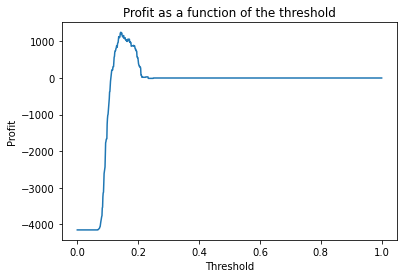

Optimal threshold: 0.14
Optimal profit: 1250.00 euros


In [108]:
#use the method defined in the previous question to determine the threhsold for the maximizing profit
profit_rf = profit_rf_class.profit_maximization(model=rf_clf)

**Explanation results:**

Relative to the profit maximizing threshold of the Logistic Model (0.16), we need to decrease the threshold in the Random Forest classifier (to 0.14) in order to achieve a maximum profit. This implies that the Random Forest model is more conservative in its predictions of positive instances. Specifically, it assigned lower probabilities of "True" (or subscribe) compared to the Logistic Model and therefore we had to lower the threshold to maximize the profit.